# Page View Time Series Visualizer

This is a visualization of the time series data of the freeCodeCamp.org forum visits from 2016-05-09 to 2019-12-03 using a line chart, bar chart and box plots . The data visualizations will help us understand the patterns in visits and identify yearly and monthly growth. The Pandas, Matplotlib, and Seaborn libraries will be used for creating the visuals.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Prepare The Data

Create a dataframe using the 'fcc-forum-pageviews.csv' file and clean the data to prepare for visualization

In [7]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ["date"], index_col = "date")

# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]


### Draw Line Plot

In [8]:
def draw_line_plot():
  # Draw line plot
  fig, ax = plt.subplots(figsize = (15,5))
  ax.plot(df.index, df['value'], color='red', linewidth=1)
  ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
  ax.set_xlabel("Date")
  ax.set_ylabel("Page Views")
  
  plt.show()

  # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')
  return fig

### Draw Bar Plot

In [9]:
def draw_bar_plot():
  # Copy and modify data for monthly bar plot
  df_bar = df.copy()
  df["month"] = df.index.month
  df["year"] = df.index.year
  df_bar = df.groupby(["year", "month"])["value"].mean()
  df_bar = df_bar.unstack()

  # Draw bar plot
  fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
  plt.xlabel("Years", fontsize= 10)
  plt.ylabel("Average Page Views", fontsize= 10)
  #plt.xticks(rotation=30)
  plt.xticks(fontsize = 10)
  plt.yticks(fontsize = 10)
  plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

  plt.show()

  # Save image and return fig (don't change this part)
  fig.savefig('bar_plot.png')
  return fig

### Draw Box Plot

In [10]:
def draw_box_plot():
  # Prepare data for box plots (this part is done!)
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]
  
  df_box["month_num"] = df_box["date"].dt.month
  df_box = df_box.sort_values("month_num")

  # Draw box plots (using Seaborn)

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_figwidth(20)
  fig.set_figheight(10)
  
  ax1 = sns.boxplot(x=df_box["year"], y=df_box["value"], ax=ax1)
  ax1.set_title("Year-wise Box Plot (Trend)") 
  ax1.set_xlabel('Year')
  ax1.set_ylabel('Page Views')
  
  ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
  ax2.set_title("Month-wise Box Plot (Seasonality)")
  ax2.set_xlabel('Month')
  ax2.set_ylabel('Page Views')
  
  plt.show()
  
  # Save image and return fig (don't change this part)
  fig.savefig('box_plot.png')
  return fig

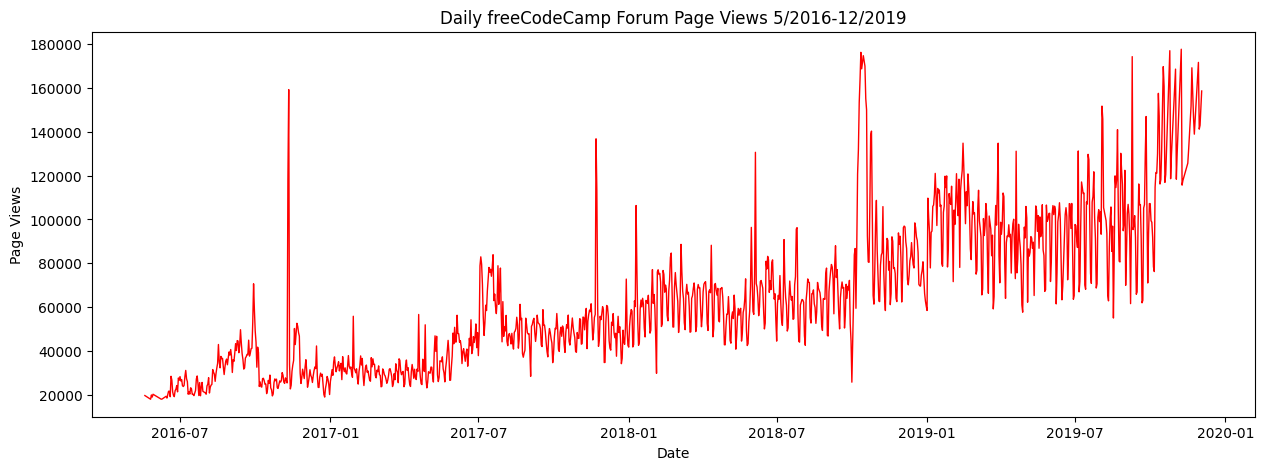

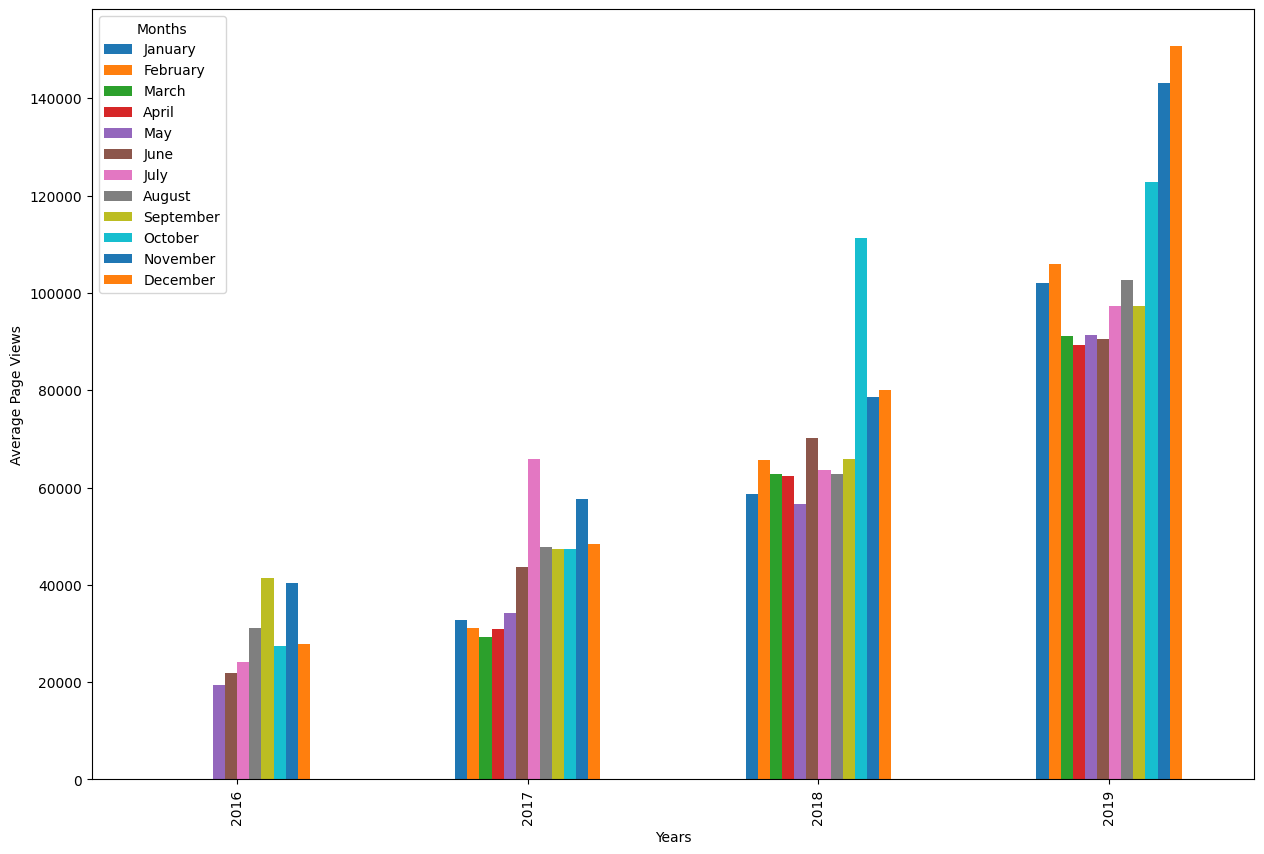

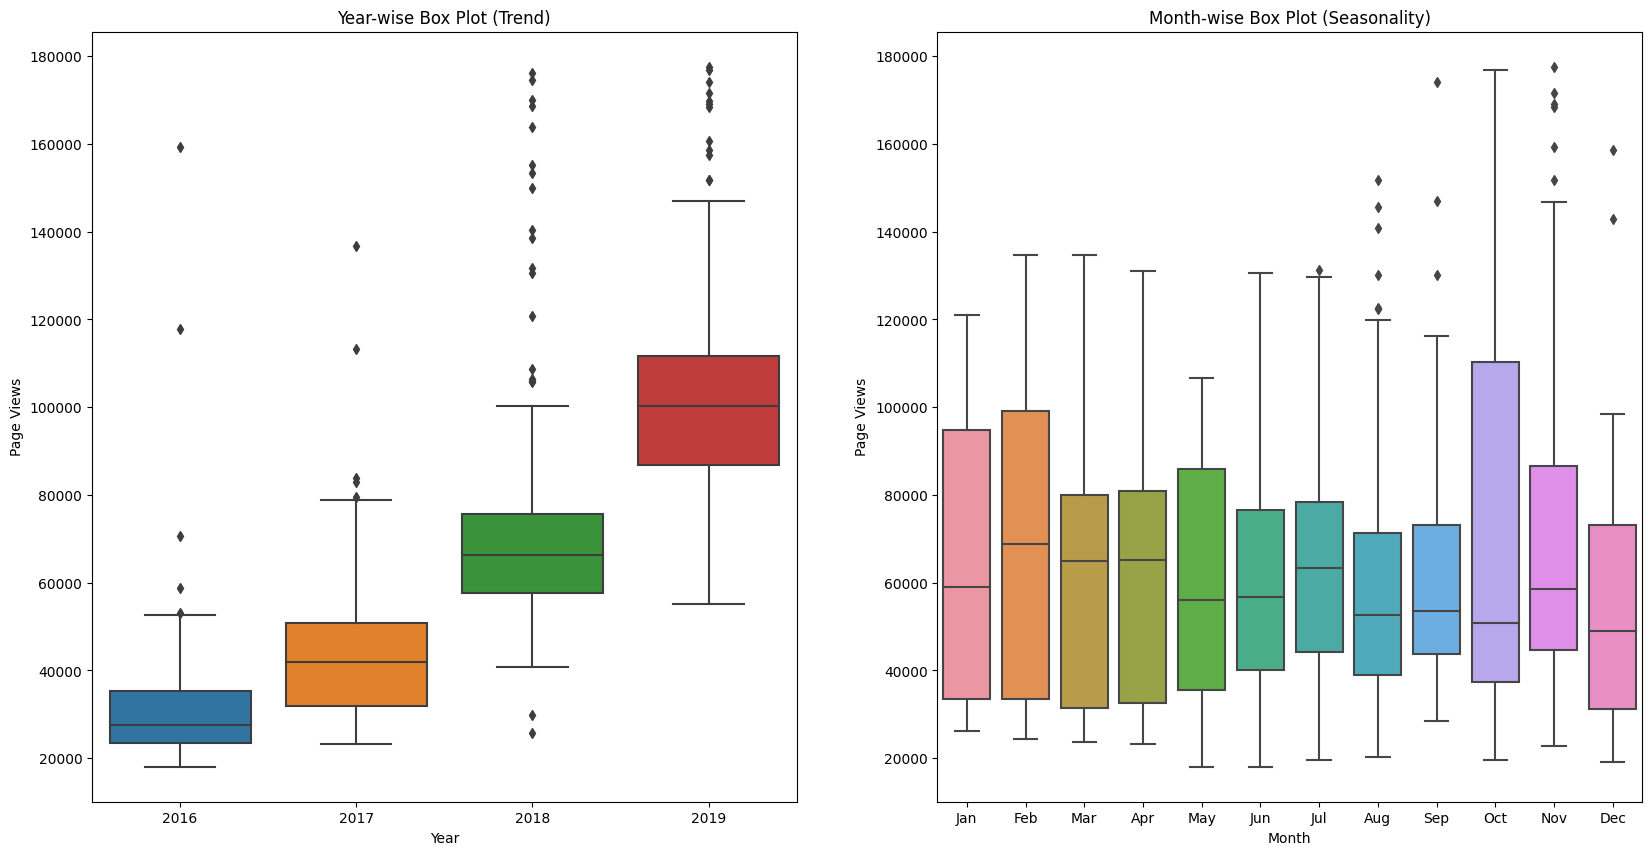

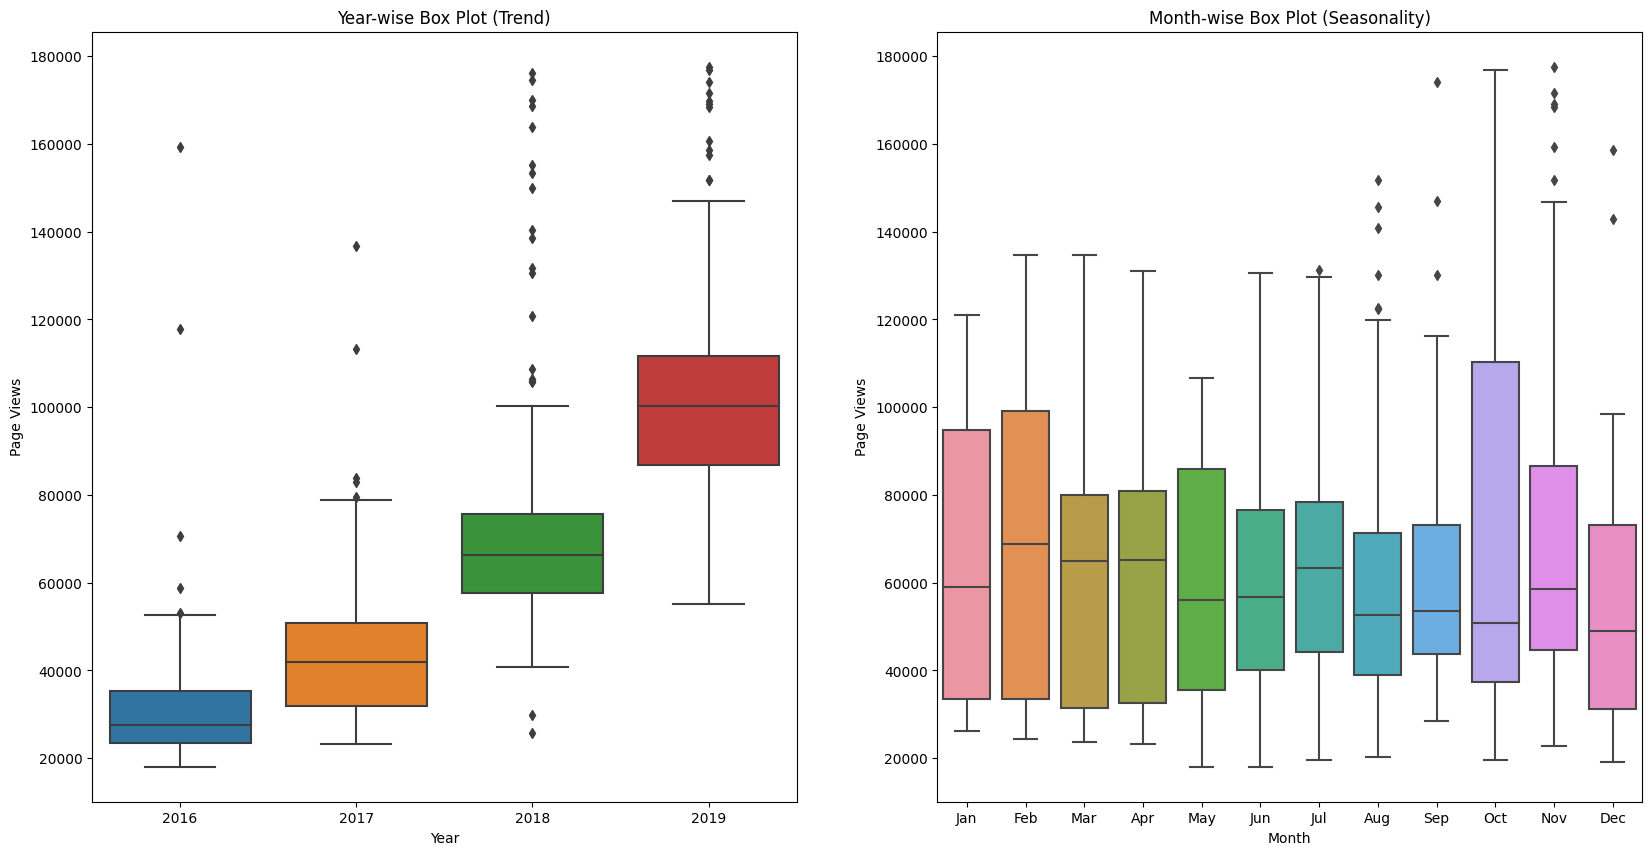

In [11]:
draw_line_plot()
draw_bar_plot() 
draw_box_plot()

# Results

We can see from the plots that page visits have been increasing year-on-year in the period we are covering (May 2016 to December 2019). The greatest increase in visits are the months that are in the fourth quarted of the tear. October to December. One case where this trend was not true was in 2017 where July recorded the highest amounts of visits. 